In [1]:
import pandas as pd
import pickle
import numpy as np 
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ComFitNet Data Exploration

In [3]:
pickle_in = open('data/CommunityFitNet.pickle', "rb")
data = pickle.load(pickle_in, encoding ='latin1')

In [4]:
data.head()

,network_index,network_name,title,description,networkDomain,subDomain,citation,sourceUrl,hostedBy,graphProperties,...,B_HKK_SBM_score,cICL_HKK_SBM_score,Infomap_score,MDL_SBM_score,MDL_DCSBM_score,S_NB_score,S_cBHm_score,S_cBHa_score,AMOS_score,LRT_WB_DCSBM_score
0,0,Aishihik_Lake_host-parasite_web_Aishihik_Lake_...,Aishihik Lake host-parasite web,"A network of parasites and their host species,...",Biological,Food web,"J.R. Arthur, L. Margolis, and H.P. Arai, ""Para...",http://www.nrcresearchpress.com/doi/abs/10.113...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Weighted, Multiplex, Bipartite",...,-0.094093,-0.098462,4.844728,297.808458,297.110269,n/a,n/a,n/a,n/a,3.13498
1,1,Arroyo_plant-pollinator_web_Elevation_1,Arroyo plant-pollinator web,A bipartite network of plants and pollinators ...,Biological,Food web,"M.T.K. Arroyo, R.B. Primack, and J.J. Armesto,...",http://link.springer.com/article/10.1007%2FBF0...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Unweighted, Bipartite",...,-0.022808,-0.018818,5.874742,1503.378297,1463.626018,n/a,n/a,n/a,n/a,3.66316
2,2,Arroyo_plant-pollinator_web_Elevation_2,Arroyo plant-pollinator web,A bipartite network of plants and pollinators ...,Biological,Food web,"M.T.K. Arroyo, R.B. Primack, and J.J. Armesto,...",http://link.springer.com/article/10.1007%2FBF0...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Unweighted, Bipartite",...,-0.032214,-0.035509,5.262080,698.516289,679.913368,n/a,n/a,n/a,n/a,3.29571
3,3,Arroyo_plant-pollinator_web_Elevation_3,Arroyo plant-pollinator web,A bipartite network of plants and pollinators ...,Biological,Food web,"M.T.K. Arroyo, R.B. Primack, and J.J. Armesto,...",http://link.springer.com/article/10.1007%2FBF0...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Unweighted, Bipartite",...,-0.036962,-0.036279,4.156492,340.838444,330.377443,n/a,n/a,n/a,n/a,2.94436
4,4,Barrett_Helenurm_plant-pollinator_web_Barrett_...,Barrett & Helenurm plant-pollinator web,A bipartite network of plants and pollinators ...,Biological,Food web,"S.C.H. Barrett and K. Helenurm, ""The Reproduct...",http://www.nrcresearchpress.com/doi/abs/10.113...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Weighted, Bipartite",...,-0.015879,-0.018329,4.928790,484.049364,432.400404,n/a,n/a,n/a,n/a,3.25708


In [4]:
data.columns

Index(['network_index', 'network_name', 'title', 'description',
       'networkDomain', 'subDomain', 'citation', 'sourceUrl', 'hostedBy',
       'graphProperties', 'nodeType', 'edgeType', 'nodes_id', 'edges_id',
       'number_nodes', 'number_edges', 'ave_degree', 'labels_Q', 'labels_Q_MR',
       'labels_Q_MP', 'labels_Q_GMP', 'labels_B_NR_SBM', 'labels_B_NR_DCSBM',
       'labels_B_HKK_SBM', 'labels_cICL_HKK_SBM', 'labels_Infomap',
       'labels_MDL_SBM', 'labels_MDL_DCSBM', 'labels_S_NB', 'labels_S_cBHm',
       'labels_S_cBHa', 'labels_AMOS', 'labels_AMOS_reliablity',
       'labels_LRT_WB_DCSBM', 'Q_score', 'Q_MR_score', 'Q_MP_score',
       'Q_GMP_score', 'B_NR_SBM_score', 'B_NR_DCSBM_score', 'B_HKK_SBM_score',
       'cICL_HKK_SBM_score', 'Infomap_score', 'MDL_SBM_score',
       'MDL_DCSBM_score', 'S_NB_score', 'S_cBHm_score', 'S_cBHa_score',
       'AMOS_score', 'LRT_WB_DCSBM_score'],
      dtype='object')

In [12]:
subset = data[['network_index', 'network_name', 'title', 'description',
       'networkDomain', 'subDomain', 'citation', 'sourceUrl', 'hostedBy',
       'graphProperties', 'nodeType', 'edgeType', 'nodes_id', 'edges_id',
       'number_nodes', 'number_edges']]
subset[subset['networkDomain'] == 'Social'].to_csv('./comfitdataset_forlabelling.csv')

In [22]:
ls = []
for i in data.columns:
    if ('labels' not in i) & ('score' not in i):
        print(i)
        ls.append(i)

network_index
network_name
title
description
networkDomain
subDomain
citation
sourceUrl
hostedBy
graphProperties
nodeType
edgeType
nodes_id
edges_id
number_nodes
number_edges
ave_degree


In [23]:
data[ls]

,network_index,network_name,title,description,networkDomain,subDomain,citation,sourceUrl,hostedBy,graphProperties,nodeType,edgeType,nodes_id,edges_id,number_nodes,number_edges,ave_degree
0,0,Aishihik_Lake_host-parasite_web_Aishihik_Lake_...,Aishihik Lake host-parasite web,"A network of parasites and their host species,...",Biological,Food web,"J.R. Arthur, L. Margolis, and H.P. Arai, ""Para...",http://www.nrcresearchpress.com/doi/abs/10.113...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Weighted, Multiplex, Bipartite",Species,Interaction,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0, 18], [0, 29], [1, 18], [1, 19], [1, 31], ...",36,127,7.055556
1,1,Arroyo_plant-pollinator_web_Elevation_1,Arroyo plant-pollinator web,A bipartite network of plants and pollinators ...,Biological,Food web,"M.T.K. Arroyo, R.B. Primack, and J.J. Armesto,...",http://link.springer.com/article/10.1007%2FBF0...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Unweighted, Bipartite",Species,Interaction,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0, 86], [0, 87], [0, 91], [0, 130], [0, 132]...",182,363,3.989011
2,2,Arroyo_plant-pollinator_web_Elevation_2,Arroyo plant-pollinator web,A bipartite network of plants and pollinators ...,Biological,Food web,"M.T.K. Arroyo, R.B. Primack, and J.J. Armesto,...",http://link.springer.com/article/10.1007%2FBF0...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Unweighted, Bipartite",Species,Interaction,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0, 47], [0, 66], [1, 59], [2, 47], [2, 58], ...",97,179,3.690722
3,3,Arroyo_plant-pollinator_web_Elevation_3,Arroyo plant-pollinator web,A bipartite network of plants and pollinators ...,Biological,Food web,"M.T.K. Arroyo, R.B. Primack, and J.J. Armesto,...",http://link.springer.com/article/10.1007%2FBF0...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Unweighted, Bipartite",Species,Interaction,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0, 47], [1, 47], [2, 44], [3, 45], [3, 57], ...",65,85,2.615385
4,4,Barrett_Helenurm_plant-pollinator_web_Barrett_...,Barrett & Helenurm plant-pollinator web,A bipartite network of plants and pollinators ...,Biological,Food web,"S.C.H. Barrett and K. Helenurm, ""The Reproduct...",http://www.nrcresearchpress.com/doi/abs/10.113...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Weighted, Bipartite",Species,Interaction,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0, 20], [0, 22], [0, 28], [0, 30], [0, 31], ...",112,166,2.964286
5,5,Beehler_seed-disperser_web_Beehler_seed-disper...,Beehler seed-disperser web,"A bipartite network of birds and plants, from ...",Biological,Food web,"B. Beehler, ""Frugivory and polygamy in birds o...",https://sora.unm.edu/sites/default/files/journ...,Data hosted by the NCEAS Interaction Web Database,"Undirected, Weighted, Bipartite",Species,Interaction,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0, 36], [0, 38], [1, 35], [2, 37], [3, 31], ...",40,119,5.950000
6,6,Binary_interactomes_various species_2012_A_tha...,Binary interactomes (various species; 2012),Networks of protein-protein interactions in 11...,Biological,Protein interactions,"J. Das and H. Yu, ""HINT: High-quality protein ...",http://www.biomedcentral.com/1752-0509/6/92/,"Data available as combined network, or, for mo...","Undirected, Unweighted",Protein,Binding,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0, 1], [1, 2], [1, 52], [1, 53], [1, 84], [1...",297,560,3.771044
7,7,Binary_interactomes_various species_2012_A_tha...,Binary interactomes (various species; 2012),Networks of protein-protein interactions in 11...,Biological,Protein interactions,"J. Das and H. Yu, ""HINT: High-quality protein ...",http://www.biomedcentral.com/1752-0509/6/92/,"Data available as combined network, or, for mo...","Undirected, Unweighted",Protein,Binding,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0, 1], [1, 2], [1

In [31]:
data.loc[0]

network_index                                                             0
network_name              Aishihik_Lake_host-parasite_web_Aishihik_Lake_...
title                                       Aishihik Lake host-parasite web
description               A network of parasites and their host species,...
networkDomain                                                    Biological
subDomain                                                          Food web
citation                  J.R. Arthur, L. Margolis, and H.P. Arai, "Para...
sourceUrl                 http://www.nrcresearchpress.com/doi/abs/10.113...
hostedBy                  Data hosted by the NCEAS Interaction Web Database
graphProperties                  Undirected, Weighted, Multiplex, Bipartite
nodeType                                                            Species
edgeType                                                        Interaction
nodes_id                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
edges_id    

In [28]:
data.loc[0,'nodes_id'] 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [36]:
data.loc[0,'edges_id']

array([[ 0, 18],
       [ 0, 29],
       [ 1, 18],
       [ 1, 19],
       [ 1, 31],
       [ 2, 18],
       [ 2, 21],
       [ 2, 22],
       [ 2, 23],
       [ 2, 30],
       [ 2, 33],
       [ 2, 34],
       [ 2, 35],
       [ 3, 18],
       [ 3, 23],
       [ 3, 35],
       [ 4, 20],
       [ 4, 32],
       [ 5, 18],
       [ 5, 21],
       [ 5, 33],
       [ 6, 20],
       [ 6, 23],
       [ 6, 32],
       [ 6, 35],
       [ 7, 19],
       [ 7, 20],
       [ 7, 21],
       [ 7, 22],
       [ 7, 23],
       [ 7, 30],
       [ 7, 31],
       [ 7, 32],
       [ 7, 33],
       [ 7, 34],
       [ 7, 35],
       [ 8, 18],
       [ 8, 19],
       [ 8, 20],
       [ 8, 21],
       [ 8, 22],
       [ 8, 23],
       [ 8, 29],
       [ 8, 30],
       [ 8, 31],
       [ 8, 32],
       [ 8, 33],
       [ 8, 34],
       [ 8, 35],
       [ 9, 19],
       [ 9, 31],
       [10, 18],
       [10, 19],
       [10, 31],
       [11, 21],
       [11, 22],
       [11, 23],
       [11, 30],
       [11, 33

In [33]:
import networkx as nx
G = nx.Graph()

In [34]:
nodelist = data.loc[0,'nodes_id'] 

In [35]:
G.add_nodes_from(nodelist)

In [37]:
edgelist = data.loc[0,'edges_id']

In [39]:
G.add_edges_from(edgelist)

In [41]:
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


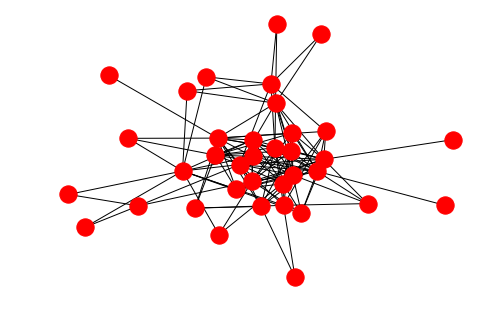

In [42]:
nx.draw(G)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


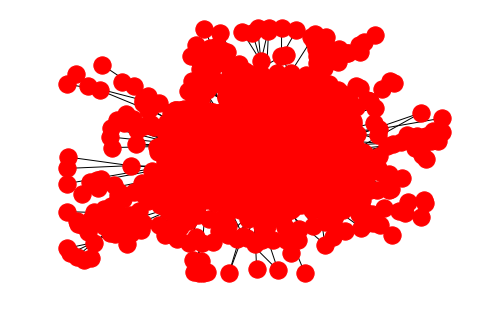

In [44]:
for i in range(0,10):
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


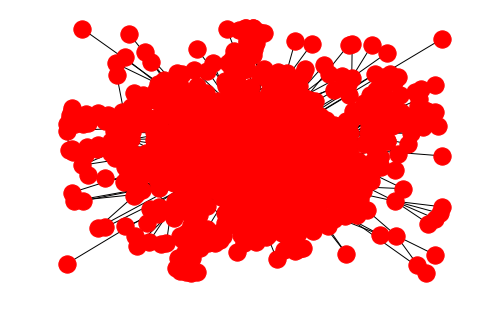

In [51]:
for i in range(0,10):
    G=nx.Graph()
    nodelist=data.loc[i,'nodes_id']
    G.add_nodes_from(nodelist)
    edgelist = data.loc[i,'edges_id']
    G.add_edges_from(edgelist)
    nx.draw(G)
    plt.savefig('test' + str(i) + '.png')

# 2. HIV Transmission Network - Edgoyads

In [225]:
os.getcwd()

'/Users/luajiongwei/Dropbox/LSE (Dropbox)/RA Docs'

In [226]:
hiv = pd.read_csv('./data/HIV Transmission Network/HIV Transmisstion Network (1998)-2001_Egoyads.tsv', sep='\t')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14,15,16,17,20,23,26,29,32,35,38,44,46,47,48,49,50,51,53,56,59,62,65,68,71,74,77,80,83,92,93,96,99,100,102,105,106,108,111,112,114,117,119,120,122,123,125,126,128,129,132,135,144,152,153,154) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [227]:
hiv.head()

,RID,ID1,ID2,DYADKEY,DYADTYPE,TIETYPE,RECENT,intdate,begdate,enddate,...,SOURCES1,BACKFIL1,OCC,OCCLOC,FRSTYR,SOURCES,STUDYNUM,YOB,YOB1,YOB2
0,1,1,106,0,0,3,1,23-Apr-1992,01-Jan-1900,01-Jan-1900,...,9,1,"FORMER EXOTIC DANCER, PRO",,1,9,1,1964,1964,1954
1,1,1,236,0,0,2,0,28-Feb-1990,01-Jan-1900,01-Jan-1900,...,9,1,"FORMER EXOTIC DANCER, PRO",,1,9,1,1964,1964,1962
2,1,1,266,0,0,2,1,23-Apr-1991,01-Jan-1900,01-Jan-1900,...,9,1,"FORMER EXOTIC DANCER, PRO",,1,9,1,1964,1964,1962
3,1,1,266,0,0,4,1,23-Apr-1991,01-Jan-1900,01-Jan-1900,...,9,1,"FORMER EXOTIC DANCER, PRO",,1,9,1,1964,1964,1962
4,1,1,283,0,0,2,1,23-Apr-1991,01-Jan-1900,01-Jan-1900,...,9,1,"FORMER EXOTIC DANCER, PRO",,1,9,1,1964,1964,1971


In [229]:
hiv.begdate = pd.to_datetime(hiv.begdate)
hiv.enddate = pd.to_datetime(hiv.enddate)
type(hiv.begdate)
type(hiv.enddate)

pandas.core.series.Series

In [230]:
hiv.relation_duration = hiv.enddate - hiv.begdate
hiv.relation_duration = hiv.relation_duration.astype('timedelta64')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [245]:
hiv[hiv.relation_duration != 0].head()

,RID,ID1,ID2,DYADKEY,DYADTYPE,TIETYPE,RECENT,intdate,begdate,enddate,...,SOURCES1,BACKFIL1,OCC,OCCLOC,FRSTYR,SOURCES,STUDYNUM,YOB,YOB1,YOB2
16508,1,1,2,0,0,4,1,29-Jul-1991,1991-07-29,1900-01-02,...,0,1,,missing (out of design),1,0,2,1900,1900,1914
16547,7,7,210,0,0,4,1,01-Aug-1991,1990-02-07,1991-08-01,...,7,1,,missing (out of design),1,7,2,1956,1956,1965
16551,7,7,1034,0,0,4,1,01-Aug-1991,1991-02-02,1991-08-01,...,7,1,,missing (out of design),1,7,2,1956,1956,1965
16555,7,7,1036,0,0,4,1,01-Aug-1991,1990-02-07,1991-08-01,...,7,1,,missing (out of design),1,7,2,1956,1956,1957
16561,8,8,6,0,0,4,1,06-Aug-1991,1991-08-06,1900-01-02,...,0,1,,missing (out of design),1,0,2,1900,1900,1970


In [232]:
nodes_and_edges = hiv.groupby(['ID1','ID2'], as_index= False).agg({'RID':'count'})

In [234]:
g = nx.Graph()

In [235]:
edges = np.unique(np.concatenate([nodes_and_edges.ID1.unique(), nodes_and_edges.ID2.unique()]))

In [236]:
g.add_nodes_from(edges)

In [237]:
g = nx.from_pandas_edgelist(nodes_and_edges, 'ID1','ID2', ['RID'])

In [52]:
degree_sequence  = sorted([deg for id, deg in g.degree()])

In [62]:
deg = np.array(degree_sequence)

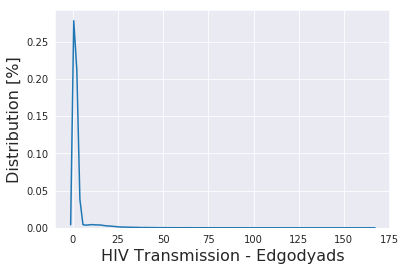

In [280]:
# Plot Degree Distribution
import seaborn as sns
sns.set_style('darkgrid')
plt.ylabel('Distribution [%]', fontsize=16)
plt.xlabel('HIV Transmission - Edgodyads', fontsize = 16)
sns.kdeplot(deg)

# 2.B HIV Transmission Network - Altdyads

In [ ]:
pd.read_csv('./data/HIV Transmission Network/HIV Transmisstion Network (1998)-2001_Altdyads.csv')

# 3. Sociology Students

Label 	Description of the response categories


1 - Best friendship	= Persons whom you would call your 'real' friends


2-  Friendship =  Persons with whom you have a good relationship, but whom you do not (yet) consider a 'real' friend

3 -  Friendly relationship  = Persons with whom you regularly have pleasant contact during classes. The contact could grow into a friendship

4 -  Neutral relationship = Persons with whom you have not much in common. In case of an accidental meeting the contact is good. The chance of it growing into a friendship is not large

0 -  Unknown person = 	Persons whom you do not know

5 -  Troubled relationship  = Persons with whom you can't get on very well, and with whom you definitely do not want to start a relationship. There is a certain risk of getting into a conflict

6, 8 - Missing Data

In [33]:
x = os.listdir('./data/Sociology Students of Groningen/')

['stud98.txt',
 'stu98t5.txt',
 'stu98t6.txt',
 'stu98t2.txt',
 'stu98t3.txt',
 'stu98t0.txt']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


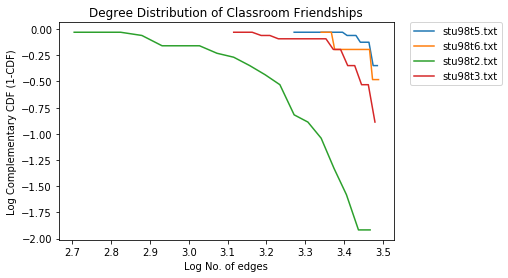

In [81]:
def draw_socistudentgraph_logCCDF(filepath):
    x = os.listdir(filepath)
    for i in x:
        if ('stud' not in i ) & ('t0' not in i):
            socistudent_matrix = pd.read_table(str(filepath)+'/'+str(i), sep='\t', header = None).drop(0, axis =1)
            socistudent_matrix = socistudent_matrix.replace(6, 0)
            socistudent_matrix = socistudent_matrix.replace(5, 0)
            socistudent_matrix = socistudent_matrix.replace(8, 0)
            socistudent_matrix = np.matrix(socistudent_matrix)
            socigraph = nx.from_numpy_matrix(socistudent_matrix)
            deg_array = np.array(sorted([deg for id, deg in socigraph.degree()]))
            num_bins=20
            counts, bin_edges = np.histogram (deg_array, bins=num_bins, normed=True)
            cdf = np.cumsum (counts)
            plt.plot (np.log(bin_edges[1:]), np.log(1-(cdf/cdf[-1])), label = str(i))
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            plt.xlabel('Log No. of edges')
            plt.ylabel('Log Complementary CDF (1-CDF)')
            plt.title('Degree Distribution of Classroom Friendships')
    plt.show()

draw_socistudentgraph_logCCDF('./data/Sociology Students of Groningen/')

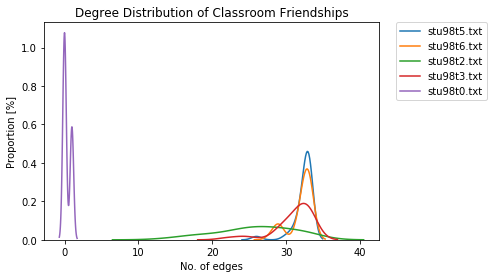

In [72]:
def draw_soci_graph_old(filepath):
    x = os.listdir(filepath)
    for i in x:
        if 'stud' not in i:
            socistudent_matrix = pd.read_table(str(filepath)+'/'+str(i), sep='\t', header = None).drop(0, axis =1)
            socistudent_matrix = socistudent_matrix.replace(6, 0)
            socistudent_matrix = socistudent_matrix.replace(5, 0)
            socistudent_matrix = socistudent_matrix.replace(8, 0)
            socistudent_matrix = np.matrix(socistudent_matrix)
            socigraph = nx.from_numpy_matrix(socistudent_matrix)
            deg_array = np.array(sorted([deg for id, deg in socigraph.degree()]))
            sns.kdeplot(deg_array, label=str(i))
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            plt.xlabel('No. of edges')
            plt.ylabel('Proportion [%]')
            plt.title('Degree Distribution of Classroom Friendships')
    plt.show()

draw_soci_graph_old('./data/Sociology Students of Groningen/')    

# Rhodes Bombing

In [2]:
os.getcwd()

'/Users/luajiongwei/Dropbox/LSE (Dropbox)/RA Docs'

In [11]:
rhodes = pd.read_csv('./data/Rhodes Bombing/RHODESBOMBING.csv', index_col=0)

In [12]:
rhodes.head()

,Alexandros Giotopoulos,Anna,Christodoulos Xiros,Constantinos Karatsolis,Constantinos Telios,Dimitris Koufontinas,Dionysis Georgiadis,Elias Gaglias,Fotis,Iraklis Kostaris,...,Patroclos Tselentis,Pavlos Serifis,Sardanopoulos,Savas Xiros,Sotirios Kondylis,Thomas Serifis,Vassilis Tzortzatos,Vassilis Xiros,Yiannis,Yiannis Skandalis
Alexandros Giotopoulos,0,1,1,0,1,1,0,0,1,0,...,0,1,1,1,0,0,0,0,1,0
Anna,1,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
Christodoulos Xiros,1,0,0,0,0,1,0,0,0,1,...,1,1,0,1,0,1,0,1,1,1
Constantinos Karatsolis,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
Constantinos Telios,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


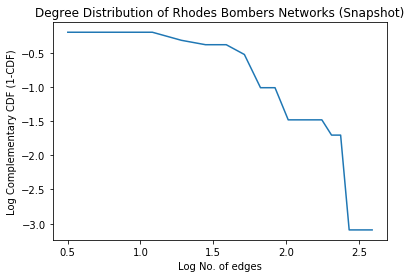

In [16]:
rhodes_matrix = np.matrix(rhodes)
rhodesgraph = nx.from_numpy_matrix(rhodes_matrix)
rhodes_deg_array = np.array(sorted([deg for id, deg in rhodesgraph.degree()]))
counts, bin_edges = np.histogram (rhodes_deg_array, bins=20, normed=True)
cdf = np.cumsum (counts)
plt.plot(np.log(bin_edges[1:]), np.log(1-(cdf/cdf[-1])))
plt.xlabel('Log No. of edges')
plt.ylabel('Log Complementary CDF (1-CDF)')
plt.title('Degree Distribution of Rhodes Bombers Networks (Snapshot)')
plt.show()

# Flixter

In [2]:
flixter_nodes = pd.read_csv('./data/Flixter/flixter_nodes.csv', header= None )
flixter_edges = pd.read_csv('./data/Flixter/flixter_edges.csv', header = None )

In [5]:
flixter_edges.head()

,0,1
0,100000,100032
1,100000,14106
2,100000,14133
3,100000,157817
4,100000,15856


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


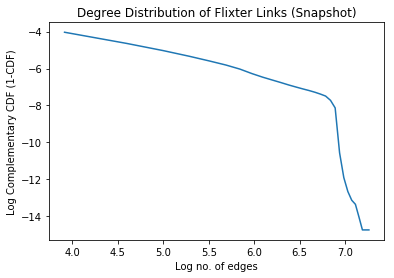

In [7]:
def generate_log_complementary_cdf_notime(df):
    fbgraph_i = nx.from_pandas_edgelist(df, 0, 1)
    fbgraph_deg_i = np.array(sorted([deg for id, deg in fbgraph_i.degree()]))
    num_bins = 30
    counts, bin_edges = np.histogram (fbgraph_deg_i, bins=num_bins, normed=True)
    cdf = np.cumsum (counts)
    plt.plot(np.log(bin_edges[1:]), np.log(1-(cdf/cdf[-1])))
    plt.xlabel('Log No. of edges')
    plt.ylabel('Log Complementary CDF (1-CDF)')
    plt.title('Degree Distribution of Flixter Links (Snapshot)')
    plt.show()

generate_log_complementary_cdf_notime(flixter_edges)

# Facebook

In [18]:
facebook = pd.read_csv('./data/Facebook/facebook-links.txt', sep='\t', header = None)

In [19]:
facebook.shape

(1545686, 3)

In [20]:
fb_with_timestamp = facebook.dropna().reset_index(drop=True)

In [21]:
fb_with_timestamp.head()

,0,1,2
0,1,20,1.217965e+09
1,1,24,1.227241e+09
2,1,25,1.229315e+09
3,38,39,1.160092e+09
4,38,40,1.163036e+09


In [22]:
from datetime  import datetime

def datestr_to_datetime(x):
    return datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

# where dates is some list of dates as a string... 
# vectorize the function
converttime = np.vectorize(datestr_to_datetime)

In [23]:
fb_with_timestamp['unix_datetime'] = converttime(fb_with_timestamp[2])

In [24]:
fb_with_timestamp['unix_datetime'] = pd.to_datetime(fb_with_timestamp['unix_datetime'])

In [25]:
fb_with_timestamp['month'] = pd.to_datetime(fb_with_timestamp['unix_datetime'].values).month

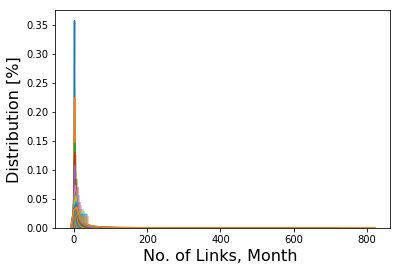

In [76]:
months = np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

def generate_deg_distribution_by_month(months,df):
    for i in months:
        df_edges = df[df['month'] <= i]
        fbgraph_i = nx.from_pandas_edgelist(df_edges, 0, 1)
        fbgraph_deg_i = np.array(sorted([deg for id, deg in fbgraph_i.degree()]))
        plt.ylabel('Distribution [%]', fontsize=16)
        plt.xlabel('No. of Links, Month ', fontsize = 16)
        sns.distplot(fbgraph_deg_i, bins=20)
    plt.show()

generate_deg_distribution_by_month(months,fb_with_timestamp)

In [27]:
def generate_log_complementary_cdf_by_month(month,df):
    for i in month:
        df_edges = df[df['month'] <= i]
        fbgraph_i = nx.from_pandas_edgelist(df_edges, 0, 1)
        fbgraph_deg_i = np.array(sorted([deg for id, deg in fbgraph_i.degree()]))
        num_bins = 30
        counts, bin_edges = np.histogram (fbgraph_deg_i, bins=num_bins, normed=True)
        cdf = np.cumsum (counts)
        plt.plot (np.log(bin_edges[1:]), np.log(1-(cdf/cdf[-1])), label = str('month' + str(i)))
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Log No. of edges')
    plt.ylabel('Log Complementary CDF (1-CDF)')
    plt.title('Degree Distribution of Facebook Links')
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


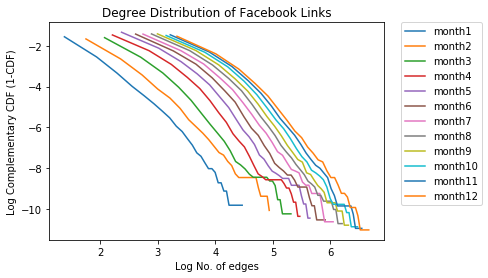

In [28]:
generate_log_complementary_cdf_by_month(months,fb_with_timestamp)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


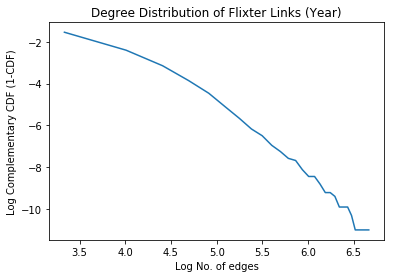

In [29]:
def generate_log_complementary_cdf_notime(df):
    fbgraph_i = nx.from_pandas_edgelist(df, 0, 1)
    fbgraph_deg_i = np.array(sorted([deg for id, deg in fbgraph_i.degree()]))
    num_bins = 30
    counts, bin_edges = np.histogram (fbgraph_deg_i, bins=num_bins, normed=True)
    cdf = np.cumsum (counts)
    plt.plot(np.log(bin_edges[1:]), np.log(1-(cdf/cdf[-1])))
    plt.xlabel('Log No. of edges')
    plt.ylabel('Log Complementary CDF (1-CDF)')
    plt.title('Degree Distribution of Flixter Links (Year)')
    plt.show()

generate_log_complementary_cdf_notime(fb_with_timestamp)